In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder


In [105]:
df=pd.read_csv("Loan_Default[2].csv")

## EDA and DATA Preprocessing

In [106]:
df.shape

(148670, 34)

In [107]:
df.duplicated().sum()

np.int64(0)

- ID: The skewness is equal to 0; that means its distribution is uniform and all values are unique without any duplication, which indicates that all borrowers in the set only apply the loan for once. To validate this assumption, we check the duplication; the result of all FALSEs in Figure 1.2 supports our hypothesis and hence we can drop this variable.
  
- Year: Min and max are identical, equal 2019, with range of 0. This signifies that there is only one year of 2019 in our dataset, so we could drop this column.

  
- Construction type: This variable contains only two classes with a highly skewed distribution. Therefore, we investigate further the significance and contribution of minority class to the set.

- Secured_by and Security_type: The same insight is applied for two variables about collateral security. Consequently, we drop these two as well.

- Upfront_charges: This is processing fee for the loan as an admin procedure, we consider this non-significant variable and drop it. Another reason to drop the column is the variable contains too many missing values, which may violate the assumption: an important factor in evaluating the risk will not be missing dramatically.

- Neg_ammortization: Amortization is just a method of paying off an amount owed over time by making planned, incremental payments of principal and interest. A loan with or without this method is considered optional and hence could be neglectable. Authors remove the column to reduce data dimension.


In [108]:
df.drop(['ID', 'year','construction_type','Secured_by','Security_Type','Upfront_charges','Neg_ammortization' ],inplace=True,axis=1)

In [109]:
df.columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'term',
       'interest_only', 'lump_sum_payment', 'property_value', 'occupancy_type',
       'total_units', 'income', 'credit_type', 'Credit_Score',
       'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV',
       'Region', 'Status', 'dtir1'],
      dtype='object')

In [110]:
df.isnull().sum()

loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
term                            41
interest_only                    0
lump_sum_payment                 0
property_value               15098
occupancy_type                   0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
LTV                          15098
Region                           0
Status                           0
dtir1                        24121
dtype: int64

In [111]:
df.isnull().sum()/len(df)*100

loan_limit                    2.249277
Gender                        0.000000
approv_in_adv                 0.610749
loan_type                     0.000000
loan_purpose                  0.090133
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest             24.509989
Interest_rate_spread         24.644515
term                          0.027578
interest_only                 0.000000
lump_sum_payment              0.000000
property_value               10.155378
occupancy_type                0.000000
total_units                   0.000000
income                        6.154571
credit_type                   0.000000
Credit_Score                  0.000000
co-applicant_credit_type      0.000000
age                           0.134526
submission_of_application     0.134526
LTV                          10.155378
Region                        0.000000
Status                   

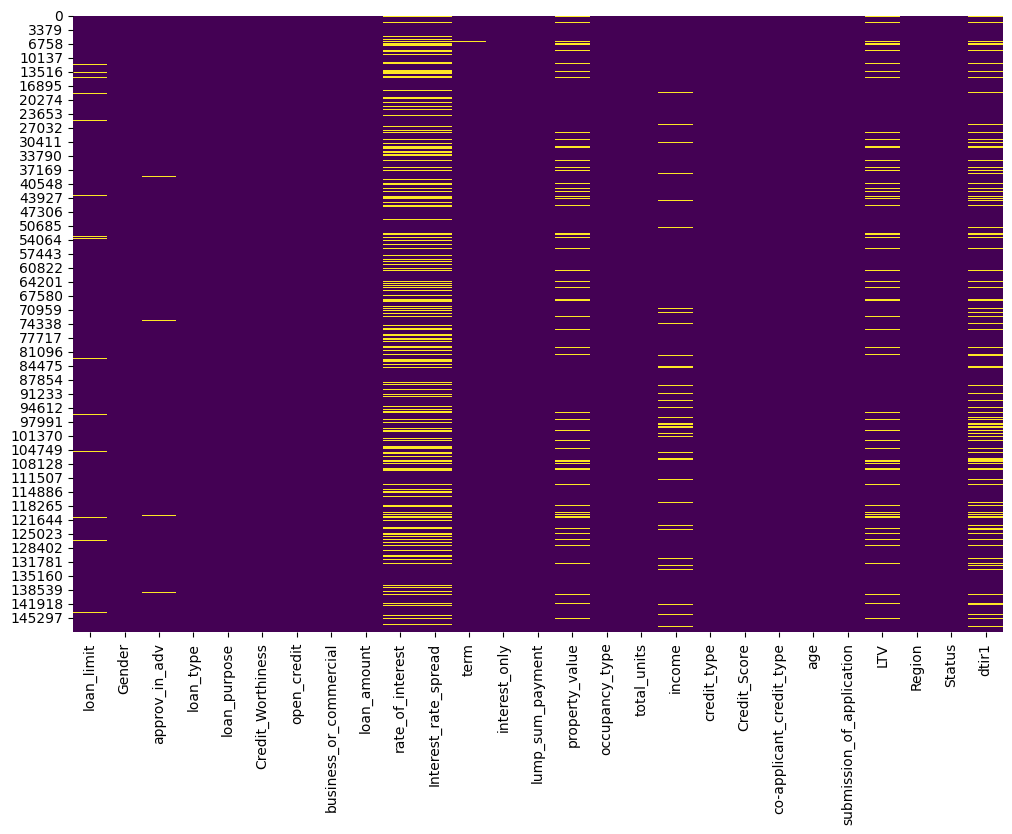

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the missing data pattern
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


- rate_of_interest and Interest_rate_spread are a pair.
- property_value and LTV, which is the relative difference between the loan amount and the current market value of a home (the property_value) are another pair.
- Income and dtir1, which is the percentage of gross monthly income that is used to pay monthly debt and determines borrowing risk, are another pair.

This means we do not need to impute all these 6 variables (3 pairs) because it will cause severe multicollinearity issues when we run models but just fill out 3 variables and drop 3 remaining ones of each pair.

Dropped variables: ltv, interest rate spread, dtir1, year, id, upfront charges , Construction type,Secured_by , Security_type, Neg_ammortization.

In [113]:
df.drop(['LTV','Interest_rate_spread','dtir1'],inplace=True, axis=1)

In [114]:
df.shape

(148670, 24)

In [115]:
df.isnull().sum()

loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
term                            41
interest_only                    0
lump_sum_payment                 0
property_value               15098
occupancy_type                   0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
Region                           0
Status                           0
dtype: int64

In [116]:
df.dropna(subset=['loan_limit','approv_in_adv','loan_purpose','age', 'term','submission_of_application'],inplace=True)

In [117]:
df.isnull().sum()

loan_limit                       0
Gender                           0
approv_in_adv                    0
loan_type                        0
loan_purpose                     0
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             35287
term                             0
interest_only                    0
lump_sum_payment                 0
property_value               14605
occupancy_type                   0
total_units                      0
income                        8835
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                              0
submission_of_application        0
Region                           0
Status                           0
dtype: int64

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        7.0000e+00, 7.5800e+02, 5.0270e+03, 1.5572e+04, 3.9958e+04,
        2.0565e+04, 1.6581e+04, 7.4440e+03, 2.0340e+03, 5.9800e+02,
        2.1600e+02, 8.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8,
        5.2, 5.6, 6. , 6.4, 6.8, 7.2, 7.6, 8. ]),
 <BarContainer object of 20 artists>)

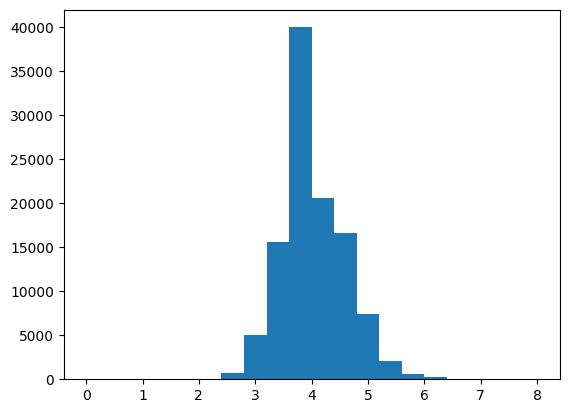

In [118]:
plt.hist(df['rate_of_interest'],bins=20)

In [119]:
print(df['rate_of_interest'].skew())
print(df['rate_of_interest'].mean())
print(df['rate_of_interest'].median())


0.397658645610867
4.040168925130543
3.99


For interest_rate, it is a fact that within a year, the rate does not vary much. The descriptive analysis gives us the normal distribution of the interest rate with very low skewness of 0.39.
The mean and the median are very close, so we could choose median imputation for Interest.

(array([8.7040e+04, 3.6322e+04, 4.3270e+03, 1.0460e+03, 3.7600e+02,
        1.9400e+02, 6.4000e+01, 3.4000e+01, 2.8000e+01, 9.0000e+00,
        5.0000e+00, 5.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([8.0000e+03, 5.5800e+05, 1.1080e+06, 1.6580e+06, 2.2080e+06,
        2.7580e+06, 3.3080e+06, 3.8580e+06, 4.4080e+06, 4.9580e+06,
        5.5080e+06, 6.0580e+06, 6.6080e+06, 7.1580e+06, 7.7080e+06,
        8.2580e+06, 8.8080e+06, 9.3580e+06, 9.9080e+06, 1.0458e+07,
        1.1008e+07, 1.1558e+07, 1.2108e+07, 1.2658e+07, 1.3208e+07,
        1.3758e+07, 1.4308e+07, 1.4858e+07, 1.5408e+07, 1.5958e+07,
        1.6508e+07]),
 <BarContainer object of 30 artists>)

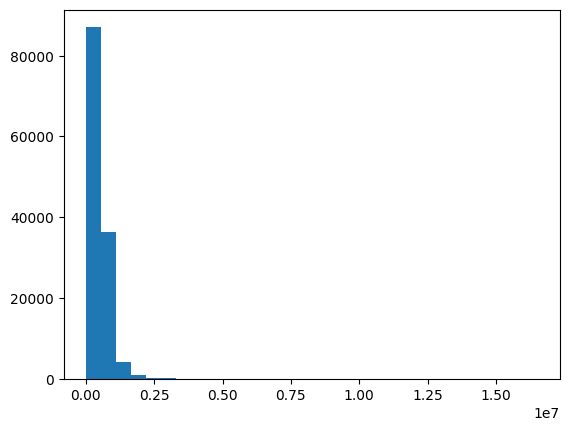

In [120]:
plt.hist(df['property_value'],bins=30)

Since the property value distributes in highly positive skewed shape

In [121]:
print(df['property_value'].skew())
print(df['property_value'].mean())
print(df['property_value'].median())


4.609565149682037
499532.3888828809
418000.0


rate_of_interest: median
property_value: median (based on total property)
income: MICE

In [122]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Sample DataFrame (replace with your actual data loading method)
# df = pd.read_csv('path_to_your_data.csv')

# 1. Impute `rate_of_interest` with median
df['rate_of_interest'] = df['rate_of_interest'].fillna(df['rate_of_interest'].median())

# 2. Impute `property_value` with median based on `total_units`
# Group by `total_units` and calculate median `property_value`
grouped_median = df.groupby('total_units')['property_value'].median()

# Function to apply the grouped median
def impute_property_value(row):
    if pd.isna(row['property_value']):
        return grouped_median[row['total_units']]
    else:
        return row['property_value']

df['property_value'] = df.apply(impute_property_value, axis=1)

# 3. Impute `income` using MICE
imputer = IterativeImputer(max_iter=10, random_state=0)
df[['income']] = imputer.fit_transform(df[['income']])

# Display the imputed DataFrame
df.head()


,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,occupancy_type,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,Region,Status
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,3.99,...,pr,1U,1740.0,EXP,758,CIB,25-34,to_inst,south,1
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,3.99,...,pr,1U,4980.0,EQUI,552,EXP,55-64,to_inst,North,1
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,...,pr,1U,9480.0,EXP,834,CIB,35-44,to_inst,south,0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,...,pr,1U,11880.0,EXP,587,CIB,45-54,not_inst,North,0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,...,pr,1U,10440.0,CRIF,602,EXP,25-34,not_inst,North,0


In [123]:
df.isnull().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
term                         0
interest_only                0
lump_sum_payment             0
property_value               0
occupancy_type               0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
Region                       0
Status                       0
dtype: int64

## Outlier Detection

To elaborate, if both range and skew of variable are high, this is the sign of outlier existence.

In [124]:
df.select_dtypes(include=['int','float']).skew()

loan_amount          1.680916
rate_of_interest     0.531311
term                -2.171595
property_value       4.887327
income              18.157788
Credit_Score         0.005738
Status               1.186186
dtype: float64

In [125]:
df.select_dtypes(include=['int','float']).max()-df.select_dtypes(include=['int','float']).min()

loan_amount          3560000.0
rate_of_interest           8.0
term                     264.0
property_value      16500000.0
income                578580.0
Credit_Score             400.0
Status                     1.0
dtype: float64

outliers are expected to exist in property_value and income.

<Axes: xlabel='income', ylabel='loan_amount'>

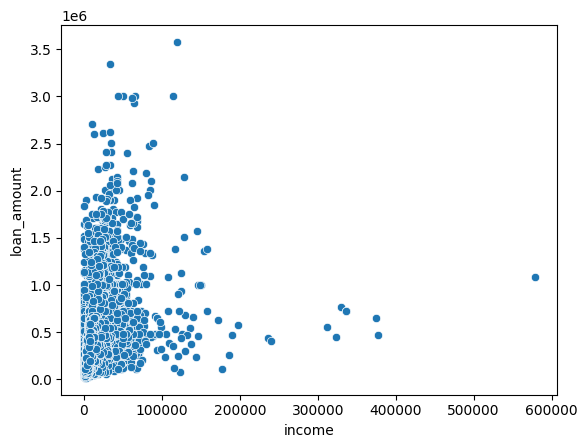

In [126]:
sns.scatterplot(x=df['income'],y=df['loan_amount'])

<Axes: xlabel='income', ylabel='rate_of_interest'>

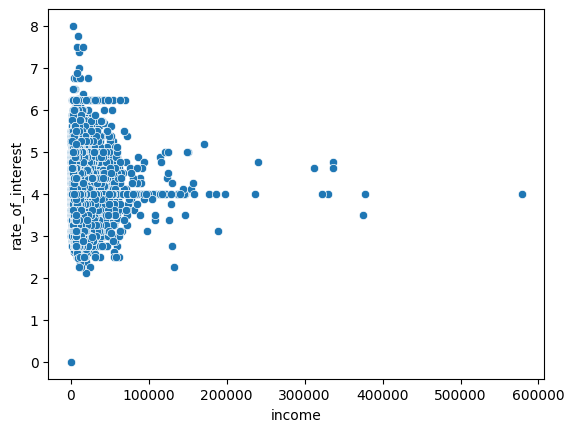

In [127]:
sns.scatterplot(x=df['income'],y=df['rate_of_interest'])

<Axes: ylabel='income'>

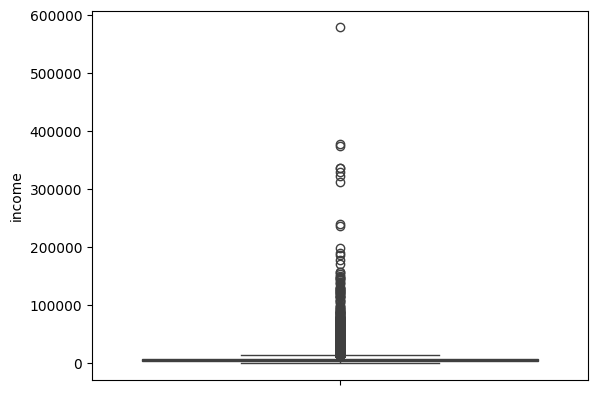

In [128]:
sns.boxplot(df['income'])

In [129]:
df['income'].describe()

count    144063.000000
mean       6962.983849
std        6296.567293
min           0.000000
25%        3840.000000
50%        6000.000000
75%        8280.000000
max      578580.000000
Name: income, dtype: float64

In [130]:
df['income'].quantile(.99)

np.float64(26040.0)

99% quantile is at 26,040 only, while the maximum is 578,580, which is 21 time higher, a huge gap for observations.

Therefore, we will remove outliers by 99% quantile for this variable.

In [131]:
df.shape

(144063, 24)

In [132]:
percentile_99 = df['income'].quantile(0.99)
df = df[df['income'] <= percentile_99]
df.shape

(142626, 24)

<Axes: ylabel='property_value'>

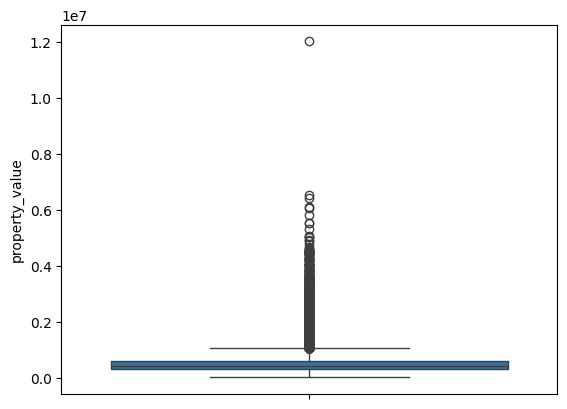

In [133]:
sns.boxplot(df['property_value'])

<Axes: xlabel='property_value', ylabel='rate_of_interest'>

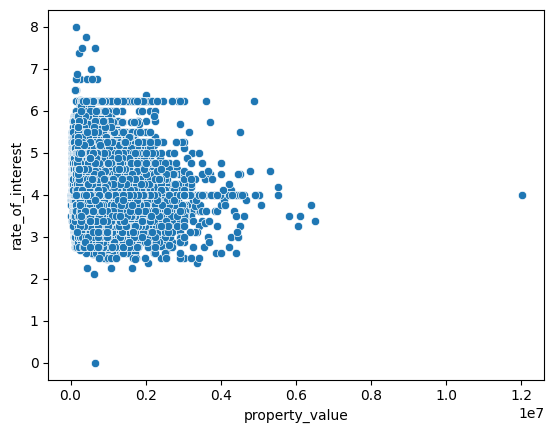

In [134]:
sns.scatterplot(x=df['property_value'],y=df['rate_of_interest'])

Investigate Property: The same procedure is applied for this variable. However, the outliers are fewer as we can see from the plot. Therefore, we choose quantile of 99.5% to cut off and remove highly unusual observations.



In [135]:
percentile_99 = df['property_value'].quantile(0.99)
df = df[df['property_value'] <= percentile_99]
df.shape

(141231, 24)

## Encoding Variables

## Label encoding for ordinal columns

In [136]:
age_mapping = {
    '45-54': 6,
    '35-44': 4,
    '55-64': 7,
    '65-74': 8,
    '25-34': 3,
    '>74': 9,
    '<25': 1
}

loan_limit_mapping = {
    'cf': 1,  # Conforming
    'ncf': 2  # Non-Conforming
}

credit_worthiness_mapping = {
    'l1': 1,  # Lower
    'l2': 2   # Higher
}

total_units_mapping = {
    '1U': 1,
    '2U': 2,
    '3U': 3,
    '4U': 4
}

# Apply mappings
df['age'] = df['age'].map(age_mapping)
df['loan_limit'] = df['loan_limit'].map(loan_limit_mapping)
df['Credit_Worthiness'] = df['Credit_Worthiness'].map(credit_worthiness_mapping)
df['total_units'] = df['total_units'].map(total_units_mapping)


pd.DataFrame(df)


,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,occupancy_type,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,Region,Status
0,1,Sex Not Available,nopre,type1,p1,1,nopc,nob/c,116500,3.990,...,pr,1,1740.0,EXP,758,CIB,3,to_inst,south,1
1,1,Male,nopre,type2,p1,1,nopc,b/c,206500,3.990,...,pr,1,4980.0,EQUI,552,EXP,7,to_inst,North,1
2,1,Male,pre,type1,p1,1,nopc,nob/c,406500,4.560,...,pr,1,9480.0,EXP,834,CIB,4,to_inst,south,0
3,1,Male,nopre,type1,p4,1,nopc,nob/c,456500,4.250,...,pr,1,11880.0,EXP,587,CIB,6,not_inst,North,0
4,1,Joint,pre,type1,p1,1,nopc,nob/c,696500,4.000,...,pr,1,10440.0,CRIF,602,EXP,3,not_inst,North,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,1,Sex Not Available,nopre,type1,p3,1,nopc,nob/c,436500,3.125,...,pr,1,7860.0,CIB,659,EXP,7,to_inst,south,0
148666,1,Male,nopre,type1,p1,1,nopc,nob/c,586500,5.190,...,ir,4,7140.0,CIB,569,CIB,3,not_inst,south,0
148667,1,Male,nopre,type1,p4,1,nopc,nob/c,446500,3.125,...,pr,1,6900.0,CIB,702,EXP,6,not_inst,North,0
148668,1,Female,nopre,type1,p4,1,nopc,nob/c,196500,3.500,...,pr,1,7140.0,EXP,737,EXP,7,to_inst,North,0


In [137]:
df.select_dtypes(include=['object']).columns

Index(['Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'open_credit',
       'business_or_commercial', 'interest_only', 'lump_sum_payment',
       'occupancy_type', 'credit_type', 'co-applicant_credit_type',
       'submission_of_application', 'Region'],
      dtype='object')

## Label encoding for nominal columns

In [138]:
from sklearn.preprocessing import LabelEncoder


nominal_columns = [
    'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'open_credit',
    'business_or_commercial', 'interest_only',
    'lump_sum_payment', 'occupancy_type',
    'credit_type', 'co-applicant_credit_type', 'submission_of_application',
    'Region'
]


# Instantiate a LabelEncoder
label_encoder = LabelEncoder()

# Apply the LabelEncoder to each column
for column in nominal_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the first few rows of the DataFrame to verify the changes
df.shape


(141231, 24)

## 2. Explanatory Data Analysis


In [94]:
df.columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'term', 'interest_only',
       'lump_sum_payment', 'property_value', 'occupancy_type', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'Region', 'Status'],
      dtype='object')

## 3. Modelling

### *Logistic Regression*

In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming df is your DataFrame and it contains the 'Status' column as the target

# Step 2: Split the data into features (X) and target (y)
X = df.drop(columns=['Status'])
y = df['Status']

# Step 3: Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Fit a logistic regression model on the training data
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Step 5: Evaluate the model on the test data
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))


C:\Users\eesha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.756894537473006
              precision    recall  f1-score   support

           0       0.77      0.98      0.86     21327
           1       0.53      0.08      0.14      6920

    accuracy                           0.76     28247
   macro avg       0.65      0.53      0.50     28247
weighted avg       0.71      0.76      0.68     28247



In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [141]:
# Fit and evaluate Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f'Decision Tree Accuracy: {dt_accuracy}')
print(classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.9041668141749566
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     21327
           1       0.81      0.80      0.80      6920

    accuracy                           0.90     28247
   macro avg       0.87      0.87      0.87     28247
weighted avg       0.90      0.90      0.90     28247



In [142]:
# Fit and evaluate Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
rf_pred = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Accuracy: {rf_accuracy}')
print(classification_report(y_test, rf_pred))



Random Forest Accuracy: 0.9226820547314759
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     21327
           1       0.84      0.84      0.84      6920

    accuracy                           0.92     28247
   macro avg       0.90      0.90      0.90     28247
weighted avg       0.92      0.92      0.92     28247



Even this is a default model, Random Forest performs effectively on both training and test sets. But let move forward to upgraded models to see if we could optimize further.

In [143]:
# Fit and evaluate XGBoost model
xgboost = XGBClassifier(random_state=42)
xgboost.fit(X_train, y_train)
xgb_pred = xgboost.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f'XGBoost Accuracy: {xgb_accuracy}')
print(classification_report(y_test, xgb_pred))


XGBoost Accuracy: 0.9253726059404539
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     21327
           1       0.84      0.86      0.85      6920

    accuracy                           0.93     28247
   macro avg       0.90      0.90      0.90     28247
weighted avg       0.93      0.93      0.93     28247

